# Лабораторная работа № 2. Методы классификации данных
# вариант №1
## выполнил студент группы 18 ивт 2 Смирнов Алексей

Цель лабораторной работы – получение навыков работы с методами классификации.
1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7. Заполните пропущенные значения в данных;
8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Кодировка классификаторов:
1 – классификатор K ближайших соседей (задаётся количество ближайших объектов);
2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
3 – линейный классификатор (персептрон);
4 – логический классификатор (бинарное решающее дерево).

In [130]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [109]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
cap-shap - форма шляпки
cap-surface - поверхность шляпки
cap-color - цвет шляпки
bruises - пятна
odor - запах
gill-attachment - форма пластинок (ламел)
gill-spacing - расстояние между пластинками
gill-size - размер пластинок
gill-color - цвет пластинок
stalk-shape - форма ножки
stalk-root - корень
stalk-surface-above-ring - форма ножки выше юбки
stalk-surface-below-ring - форма ножки ниже юбки
stalk-color-above-ring - цвет ножки выше юбки
stalk-color-below-ring - цвет ножки ниже юбки
veil-type - форма юбки
veil-color - цвет юбки
ring-number - количество колец
ring-type - тип кольца
spore-print-color - цвет спор
population - популяция
habitat - среда обитания

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [111]:
data.shape

(8124, 23)

In [112]:
data = data.drop_duplicates()

In [113]:
data.shape

(8124, 23)

### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

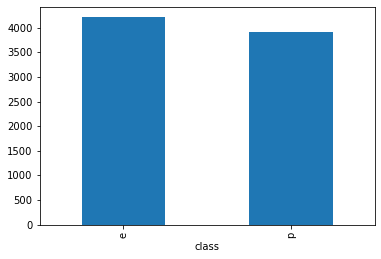

In [114]:
data.groupby('class')['class'].count().plot(kind='bar')

### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)
не требуется, количественных признаков нет
### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
признак veil-type удалён, так как имеет лишь одно значение, остальные заменены с помощью LabelEncoder, как наиболее простого способа, Dummy-кодирование не используется, так как было бы слишком большое количество столбцов

In [115]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [116]:
data = data.drop('veil-type',axis = 1)

In [117]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
categoricalColumns = data.columns
for column in categoricalColumns :
    data[column] = labelEncoder.fit_transform(data[column])
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)
корреляция наблюдается между veil-color и gill-attachment

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.015193,-0.034399,0.223439,0.235794,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216


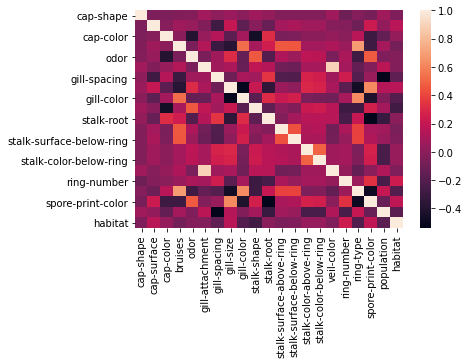

In [118]:
correlation = data.drop('class',axis = 1).corr()
sns.heatmap(correlation)
correlation

In [142]:
data = data.drop('veil-color', axis = 1)

### 7. Заполните пропущенные значения в данных
не требуется, пропусков нет
### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

In [143]:
X, Y = data.drop('class', axis=1), data['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 40)

print(X_train.shape)
print(X_test.shape)

(4874, 20)
(3250, 20)


In [144]:
perc = Perceptron()
parameters = {'alpha' : np.linspace(0,1,50)[1:],
              'max_iter' : list(range(1,100,1))}
grid = GridSearchCV(estimator = perc,param_grid = parameters, n_jobs = -1)
grid.fit(X_train, Y_train)
bestAlpha = grid.best_estimator_.alpha
maxIter = grid.best_estimator_.max_iter
bestScore = grid.best_score_
print(bestAlpha)
print(maxIter)
print(bestScore)

0.02040816326530612
5
0.9464484810193229


In [145]:
perceptron = Perceptron(alpha=bestAlpha,max_iter=maxIter)
perceptron.fit(X_train, Y_train)
testScore  = np.mean(Y_test == perceptron.predict(X_test))
testScore

0.9295384615384615

In [146]:
neighb = KNeighborsClassifier()
parametersN = {'n_neighbors': list(range(1, 20))}
gridN = GridSearchCV(estimator = neighb,param_grid = parametersN, n_jobs = -1)
gridN.fit(X_train, Y_train)
nCount = gridN.best_estimator_.n_neighbors
bestScoreN = gridN.best_score_
print(nCount)
print(bestScoreN)

1
0.9991794871794871


In [147]:
neighbors = KNeighborsClassifier(n_neighbors = nCount)
neighbors.fit(X_train, Y_train)
testScoreN  = np.mean(Y_test == neighbors.predict(X_test))
testScoreN

1.0

In [148]:
cccv = CalibratedClassifierCV(perceptron, cv=10)

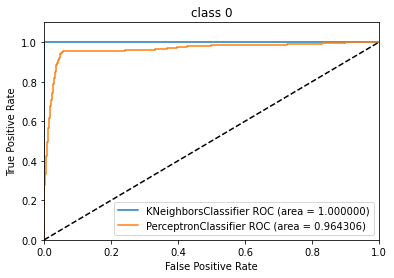

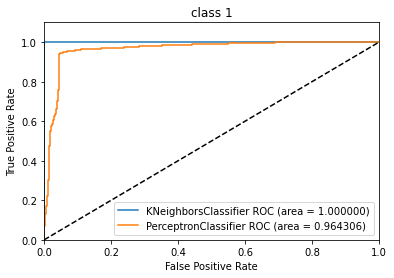

In [149]:
plt.figure()

neighbors = KNeighborsClassifier(n_neighbors = nCount)
probasN0 = neighbors.fit(X_train, Y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(Y_test, probasN0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 

perceptron = Perceptron(alpha=bestAlpha,max_iter=maxIter)
probaP0 = cccv.fit(X_train, Y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(Y_test, probaP0[:,0])
roc_auc  = auc (fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))   

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('class 0')
plt.show()


plt.figure()

neighbors = KNeighborsClassifier(n_neighbors = nCount)
probasN1 = neighbors.fit(X_train, Y_train).predict_proba (X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probasN1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 

perceptron = Perceptron(alpha=bestAlpha,max_iter=maxIter)
probaP1 = cccv.fit(X_train, Y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probaP1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))   

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('class 1')
plt.show()

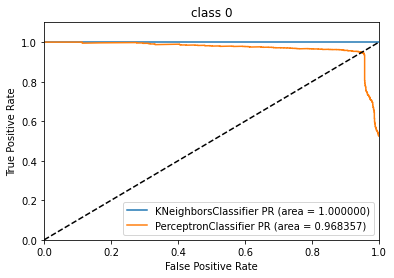

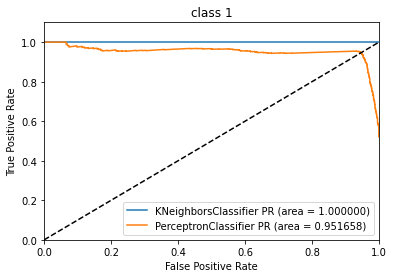

In [150]:
YtestInv = []
for y in Y_test.ravel():
    YtestInv.append(1-y)

plt.figure()

precision, recall, thresholds = precision_recall_curve(YtestInv, probasN1[:,0])
apsN1 = average_precision_score(YtestInv,probasN1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', apsN1)) 

precision, recall, thresholds = precision_recall_curve(YtestInv, probaP1[:,0])
apsP1 = average_precision_score(YtestInv,probaP1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  apsP1))  

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('class 0')
plt.show()


plt.figure()

precision, recall, thresholds = precision_recall_curve(Y_test, probasN0[:,1])
apsN0 = average_precision_score(Y_test,probasN0[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', apsN0)) 

precision, recall, thresholds = precision_recall_curve(Y_test, probaP1[:,1])
apsP1 = average_precision_score(Y_test,probaP1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  apsP1))   

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('class 1')
plt.show()

### 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

# Вывод:
классификаторы типа персептрон и K ближайших соседей (задаётся количество ближайших объектов) решают задачу с высокой достоверностью, однако, K ближайших соседей (задаётся количество ближайших объектов) имеет большую достоверность.